Using data from https://github.com/8090-inc/top-coder-challenge/ - public_cases.json

## About the Problem
Reverse engineering a 60-year-old travel reimbursement system using only historical data and employee interviews. Applying ML techniques to discover business logic patterns and create predictive models that replicate the legacy system's behavior. 
The legacy reimbursement system has been running for 60 years but no one knows how it works. A new system was built but the company doesn't know the differences in the results. 
Use ML to understand the original business logic and create a model that can explain/predict the legacy system's behavior. 

## Input Variables 
This is the data provided by the legacy system:
- trip_duration_days: number of days spent traveling (int)
- miles_traveled: total miles traveled (int)
- total_receipts_amount: total dollar amount of receipts (flot)

## Output Data
This is what the ML model is supposed to predict
- Single numeric reimbursement amount (float, rounded to 2 decimal places)

## About the Dataset
1,000 historical input/output examples from public_cases.json. 750 should be used for training and the remaining 250 should be for testing. 

In [10]:
# Install all libraries
%pip install matplotlib
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.0 MB 19.1 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.0 MB 28.5 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 28.6 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Getting Data

### Documentation used:
- https://stackoverflow.com/questions/77588476/how-can-i-install-matplotlib-in-jupyter-notebook
- https://www.geeksforgeeks.org/data-visualization/box-plot-in-python-using-matplotlib/
- https://saturncloud.io/blog/how-to-load-a-json-file-in-jupyter-notebook-using-pandas/

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [ ]:
# Getting data from the JSON file
contents = []

try:
    with open("public_cases.json", 'r') as f:
        contents = json.load(f)
except Exception as e:
    print(e)

input = [item.get("input") for item in contents]

miles = [item.get("miles_traveled") for item in input]
days = [item.get("trip_duration_days") for item in input]
amount = [item.get("total_receipts_amount") for item in input]
output = [item.get("expected_output") for item in contents]

print(days)
print(miles)
print(amount)
print(output)

[3, 1, 1, 2, 3, 1, 3, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1, 1, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 11, 9, 8, 12, 8, 9, 12, 11, 10, 12, 9, 9, 12, 8, 10, 10, 8, 9, 9, 6, 2, 5, 3, 5, 6, 3, 3, 3, 7, 7, 2, 3, 6, 1, 1, 7, 1, 1, 3, 4, 6, 1, 1, 10, 2, 9, 1, 2, 5, 1, 3, 3, 1, 1, 1, 2, 2, 3, 1, 3, 1, 3, 2, 1, 2, 3, 3, 1, 1, 5, 6, 8, 7, 5, 8, 8, 8, 9, 6, 8, 8, 9, 9, 9, 9, 5, 5, 6, 6, 9, 6, 8, 9, 7, 8, 6, 8, 8, 6, 7, 9, 6, 9, 9, 6, 6, 9, 7, 6, 12, 4, 11, 13, 1, 3, 1, 11, 2, 10, 6, 8, 10, 5, 5, 2, 5, 12, 7, 3, 4, 2, 1, 8, 4, 10, 1, 4, 1, 8, 12, 14, 2, 5, 5, 10, 8, 6, 2, 9, 6, 8, 12, 6, 2, 5, 12, 9, 1, 11, 10, 5, 6, 12, 1, 11, 10, 4, 13, 6, 11, 1, 13, 8, 14, 11, 3, 3, 4, 3, 8, 14, 3, 5, 6, 2, 10, 7, 1, 11, 11, 12, 7, 9, 12, 5, 12, 4, 13, 8, 9, 14, 5, 4, 11, 12, 2, 14, 3, 11, 14, 5, 3, 11, 1, 9, 9, 10, 4, 1, 10, 11, 10, 1, 11, 10, 5, 8, 12, 11, 7, 3, 12, 3, 11, 9, 4, 12, 1, 8, 9, 3, 5, 10, 10, 3, 12, 12, 9, 3, 3, 3, 11, 10, 14, 4, 5, 7, 6, 9, 1, 3, 8, 14, 1, 2, 11, 10, 12, 11

## Statistical Summary of All Input/Output Variables

Text(0.5, 1.0, 'Statistical Summary of Total Reciept Amounts')

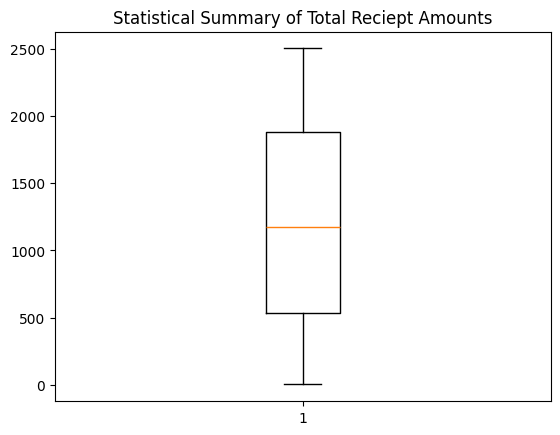

In [42]:
plt.boxplot(amount)
plt.title("Statistical Summary of Total Reciept Amounts")

Text(0.5, 1.0, 'Statistical Summary of Miles Traveled')

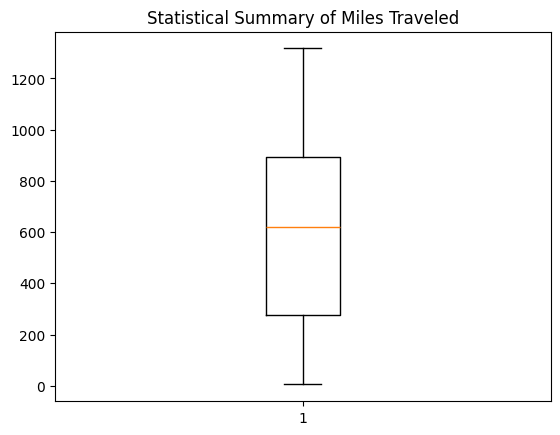

In [43]:
plt.boxplot(miles)
plt.title("Statistical Summary of Miles Traveled")

Text(0.5, 1.0, 'Statistical Summary of Trip Duration Days')

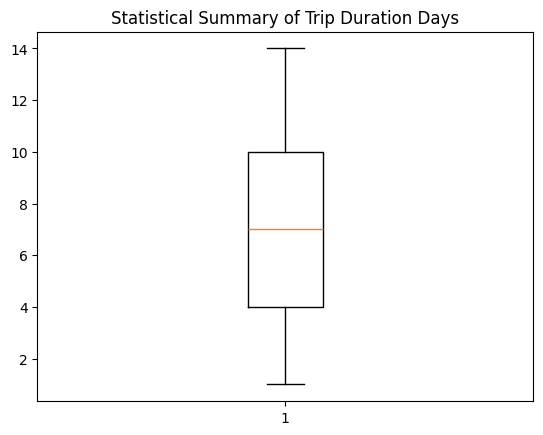

In [44]:
plt.boxplot(days)
plt.title("Statistical Summary of Trip Duration Days")

Text(0.5, 1.0, 'Statistical Summary of Expected Output')

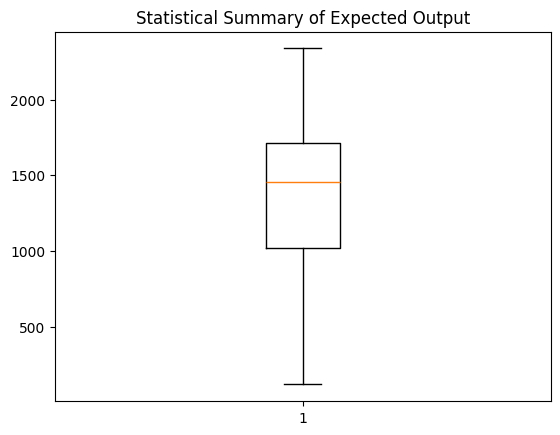

In [45]:
plt.boxplot(output)
plt.title("Statistical Summary of Expected Output")

## Distribution Analysis and Visualization